In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sb
import pandas_profiling as pd_prof

In [2]:
from google.colab import drive
drive.mount('/content/drive')
sales_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/outlet_sales_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_duplicate=sales_data.copy()# making the copy for getting inferance of the original data

In [5]:
data_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data_duplicate.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#!pip install pandas-profiling==2.8.0

In [8]:
pd_prof.ProfileReport(data_duplicate)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
data_duplicate.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### There are null values and we do not drop it because we will lose significant data.

In [10]:
data_dictionary=dict(data_duplicate.dtypes)

In [11]:
data_dictionary

{'Item_Fat_Content': dtype('O'),
 'Item_Identifier': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Item_Outlet_Sales': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Weight': dtype('float64'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Size': dtype('O'),
 'Outlet_Type': dtype('O')}

In [12]:
numerical_columns=[]
categorial_columns=[]
for i in data_dictionary:
    if data_dictionary[i] in ['float64', 'int64', 'float32', 'int32']:
        numerical_columns.append(i)
    else:
        categorial_columns.append(i)

In [13]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [14]:
categorial_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
categorial_data=data_duplicate[categorial_columns]

In [16]:
dummies_data=pd.get_dummies(categorial_data, prefix='a')
numerical_data=data_duplicate[numerical_columns]
dummies_data.head()

,a_DRA12,a_DRA24,a_DRA59,a_DRB01,a_DRB13,a_DRB24,a_DRB25,a_DRB48,a_DRC01,a_DRC12,a_DRC13,a_DRC24,a_DRC25,a_DRC27,a_DRC36,a_DRC49,a_DRD01,a_DRD12,a_DRD13,a_DRD15,a_DRD24,a_DRD25,a_DRD27,a_DRD37,a_DRD49,a_DRD60,a_DRE01,a_DRE03,a_DRE12,a_DRE13,a_DRE15,a_DRE25,a_DRE27,a_DRE37,a_DRE48,a_DRE49,a_DRE60,a_DRF01,a_DRF03,a_DRF13,...,a_Low Fat,a_Regular,a_low fat,a_reg,a_Baking Goods,a_Breads,a_Breakfast,a_Canned,a_Dairy,a_Frozen Foods,a_Fruits and Vegetables,a_Hard Drinks,a_Health and Hygiene,a_Household,a_Meat,a_Others,a_Seafood,a_Snack Foods,a_Soft Drinks,a_Starchy Foods,a_OUT010,a_OUT013,a_OUT017,a_OUT018,a_OUT019,a_OUT027,a_OUT035,a_OUT045,a_OUT046,a_OUT049,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


 # **Exploratory Data Analysis:**

## **Numerical columns:**

In [17]:
numerical_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### **Item Weight   vs   Item Outlet Sales:**

### How Item Weight is dependent on our target variable?
### Is Item Weight significant in calculating the item_outlet_sales?                                               

In [18]:
?sb.scatterplot

In [19]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


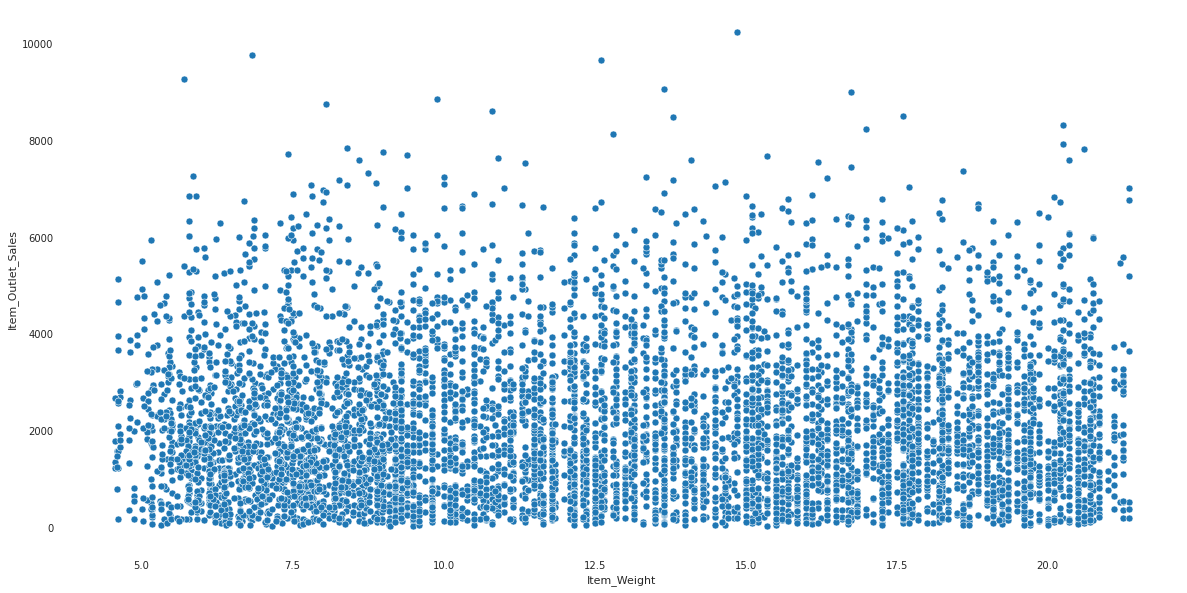

In [20]:
plt.figure(figsize=(20,10))
sb.scatterplot(numerical_data['Item_Weight'],numerical_data['Item_Outlet_Sales'])

### **Conclusion: By the above graph we conclude that there is no pattern or correlation between item_outlet_sales and item_weight.**

#  

###  **Item Visibility vs Item Outlet Sales:**

###  Item_visibility infers that if the value is less , then it is easily accessible and more visible to the customer:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


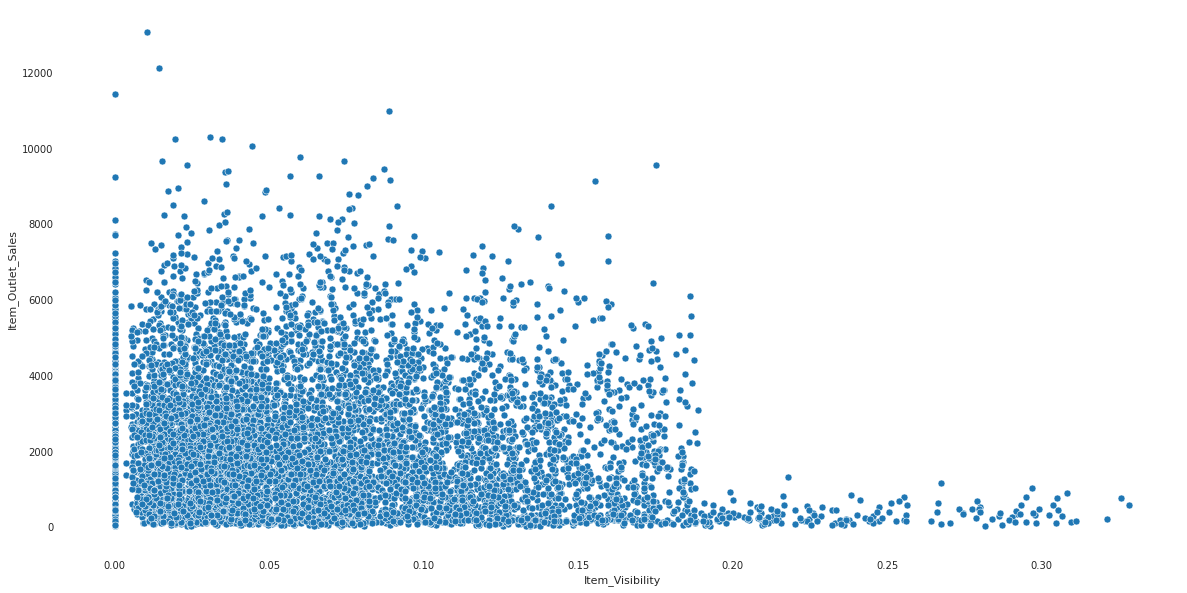

In [21]:
plt.figure(figsize=(20,10))
sb.scatterplot(numerical_data['Item_Visibility'],numerical_data['Item_Outlet_Sales'])

### **Conclusion: Highly visible or easily accessible items are more sold out when compared to less visible that means this attribute makes some inference to the target variable**

###  **Item MRP vs Item Outlet Sales:**

### ItemMRP: cost of each item

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


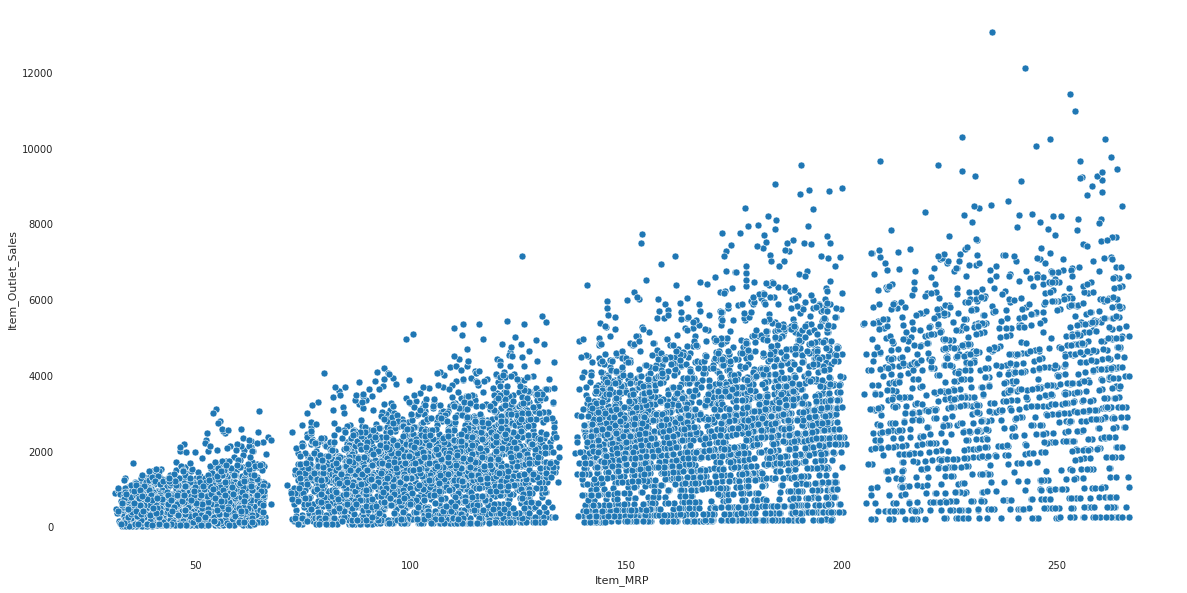

In [22]:
plt.figure(figsize=(20,10))
sb.scatterplot(numerical_data['Item_MRP'],numerical_data['Item_Outlet_Sales'])

### **Conclusion: High range of Item_MRP has more sales when compared to low range of Item_MRP so this attribute also makes some inference for the target variable.**

### **Outlet Establishment Year vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


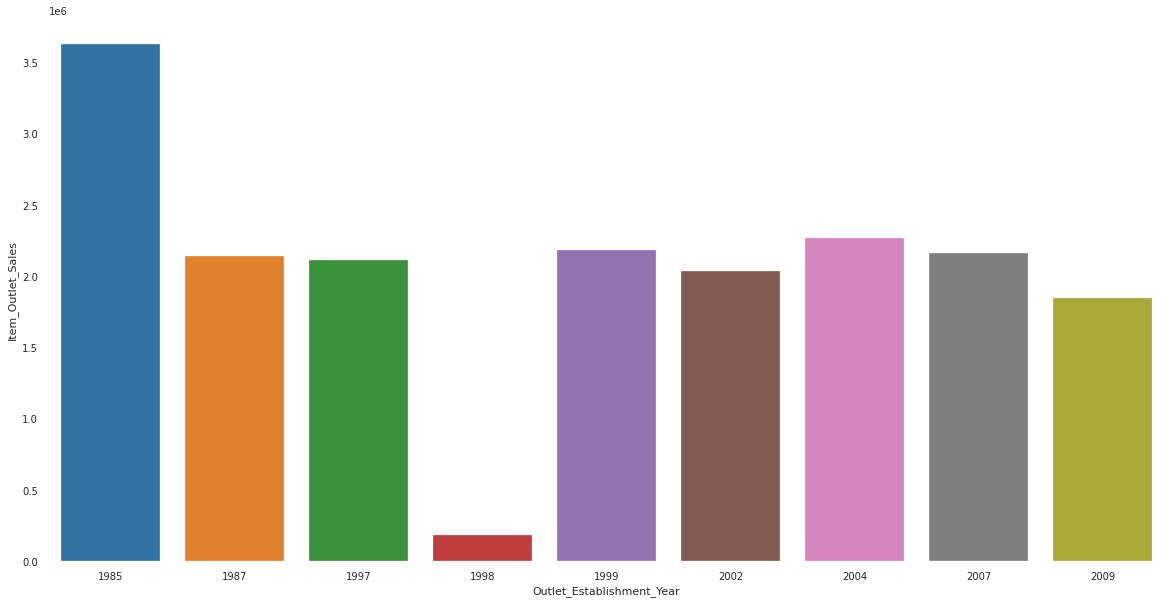

In [23]:
plt.figure(figsize=(20,10))
x=pd.DataFrame(data_duplicate.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Outlet_Establishment_Year'],x['Item_Outlet_Sales'])

### **Conclusion: There is no much inference with respect to outlet establishment year, hence it is less significant.**

## **Categorical columns:**

In [24]:
categorial_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


### **Item Fat content vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


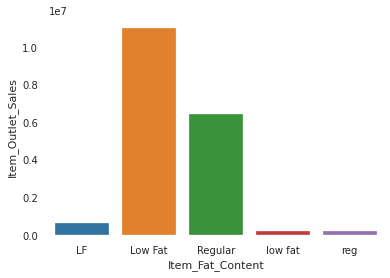

In [25]:
x=pd.DataFrame(data_duplicate.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(x['Item_Fat_Content'],x['Item_Outlet_Sales'])

#### In the data, there are four categories of Item_Fat_content, 'LF' and 'low fat' are same and so Regular and reg.

In [26]:
for i in range(len(data_duplicate['Item_Fat_Content'])):
    if data_duplicate['Item_Fat_Content'][i]=='LF':
        data_duplicate['Item_Fat_Content'][i]='Low Fat'
    if data_duplicate['Item_Fat_Content'][i]=='reg':
        data_duplicate['Item_Fat_Content'][i]='Regular'
    if data_duplicate['Item_Fat_Content'][i]=='low fat':
        data_duplicate['Item_Fat_Content'][i]='Low Fat'
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


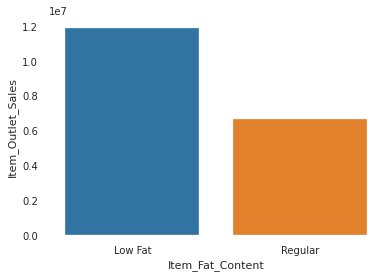

In [27]:
y=pd.DataFrame(data_duplicate.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Fat_Content'],y['Item_Outlet_Sales'])

#### **Conclusion: Low Fat Content items have higher item_outlet_sales.**

---



### **Item Type vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


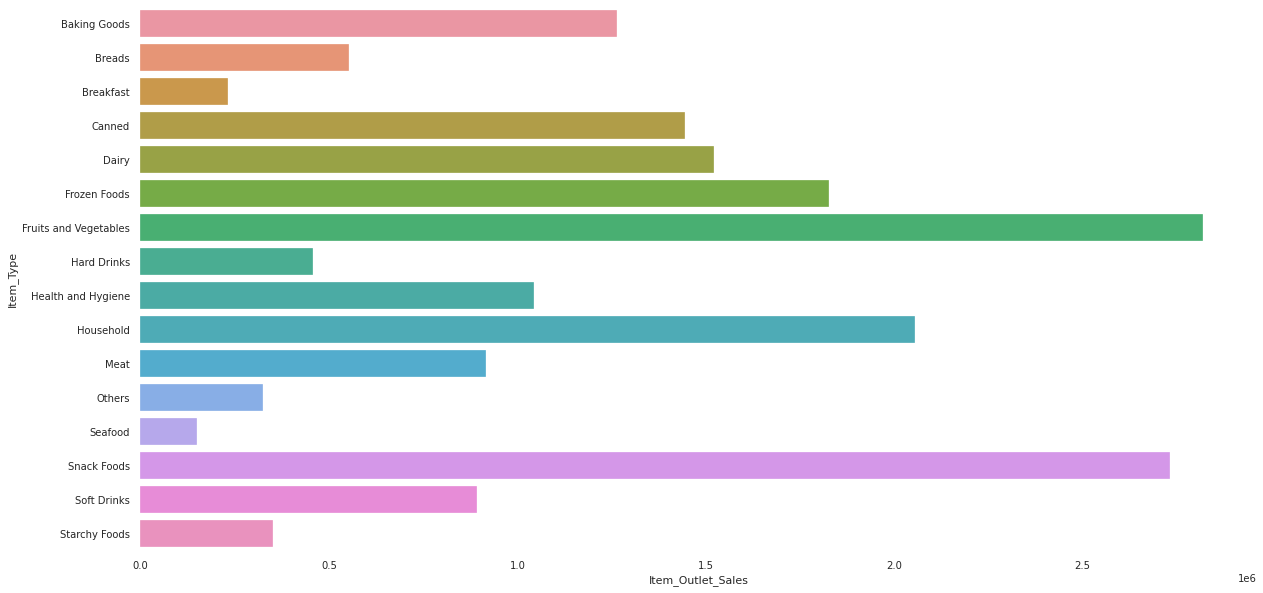

In [28]:
plt.figure(figsize=(20,10))
y=pd.DataFrame(data_duplicate.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Item_Type'])

### **Conclusion: Fruits and Vegetables, Snack Foods constitute the highest of item_outlets_sales.** 

### **Outlet Identifier vs Item Outlet Sales:**

In [29]:
data_duplicate.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


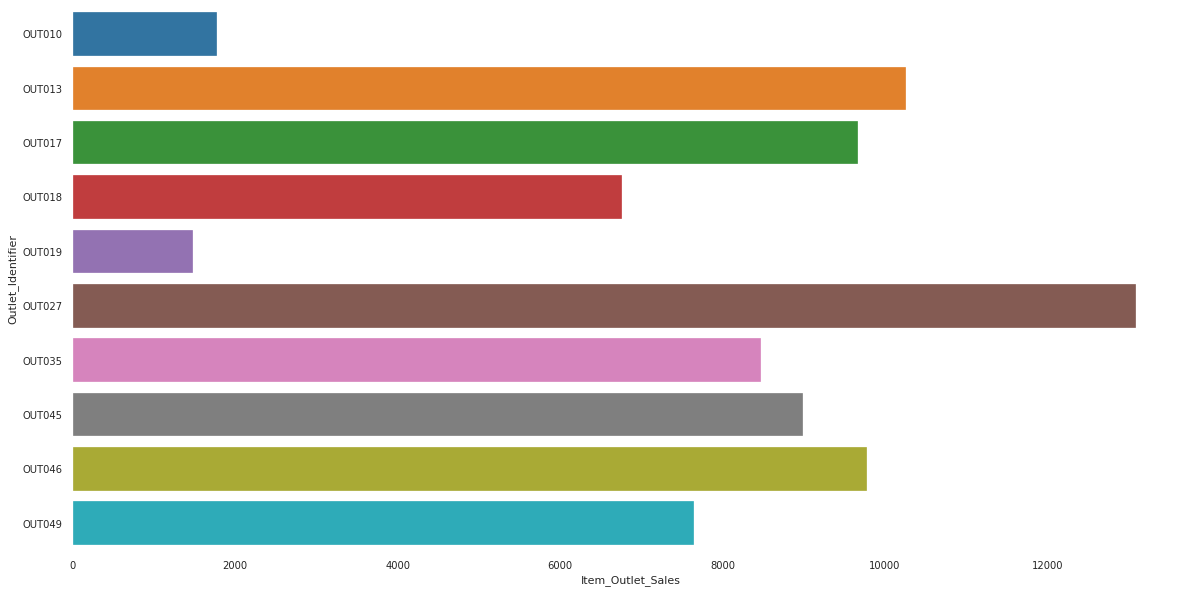

In [30]:
plt.figure(figsize=(20,10))
y=pd.DataFrame(data_duplicate.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].max()).reset_index()
sb.barplot(y['Item_Outlet_Sales'],y['Outlet_Identifier'])

#### **Conclusion: Outlet OUT027 have highest item_outlet_sales.**

### **Outlet Size vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


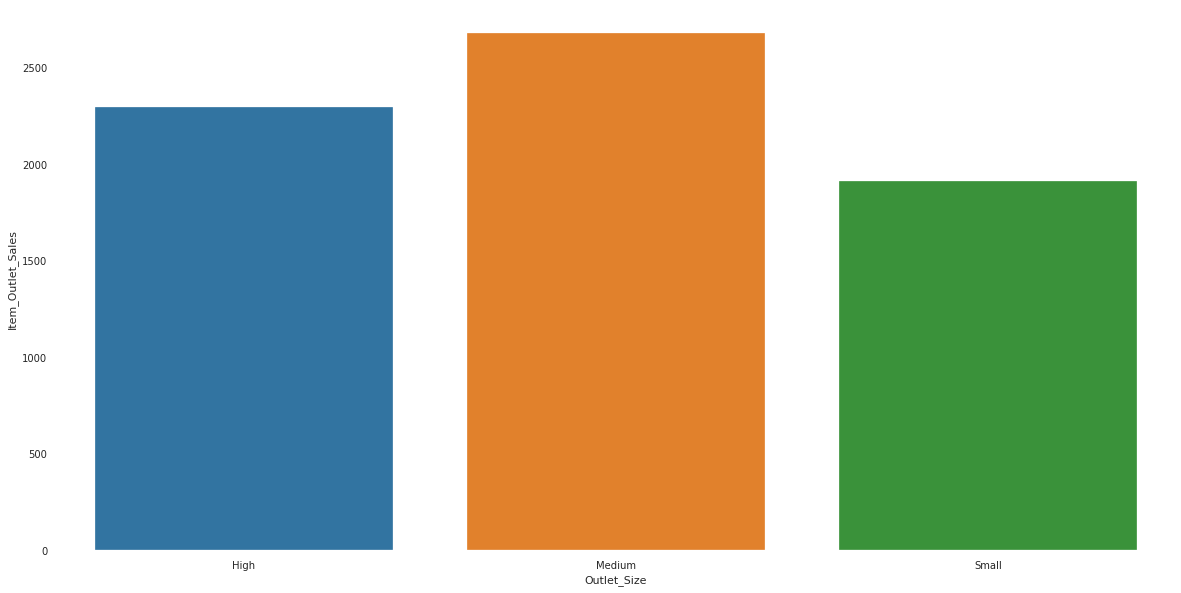

In [31]:
plt.figure(figsize=(20,10))
y=pd.DataFrame(data_duplicate.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Size'],y['Item_Outlet_Sales'])

#### **Conclusion: Medium sized stores have high item_outlet_sales.**

### **Outlet Location Type vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


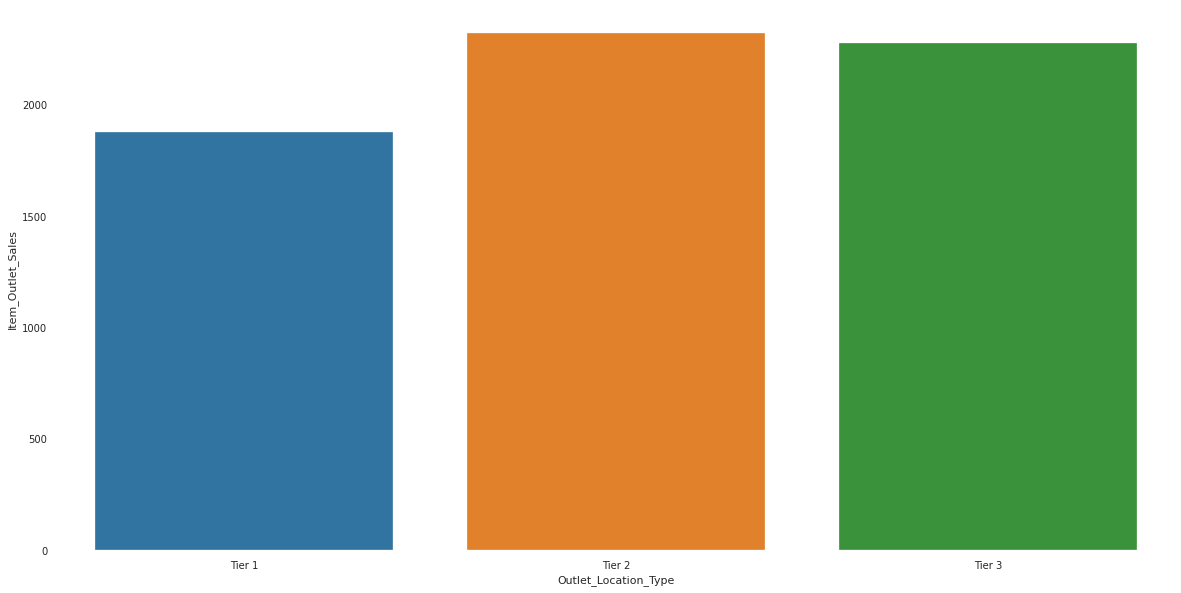

In [32]:
plt.figure(figsize=(20,10))
a=pd.DataFrame(data_duplicate.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(a['Outlet_Location_Type'],a['Item_Outlet_Sales'])

### **Conclusion:Tier 2 cities avg sales are higher than tier 3 and tier 1 cities.**

### **Outlet Type vs Item Outlet Sales:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


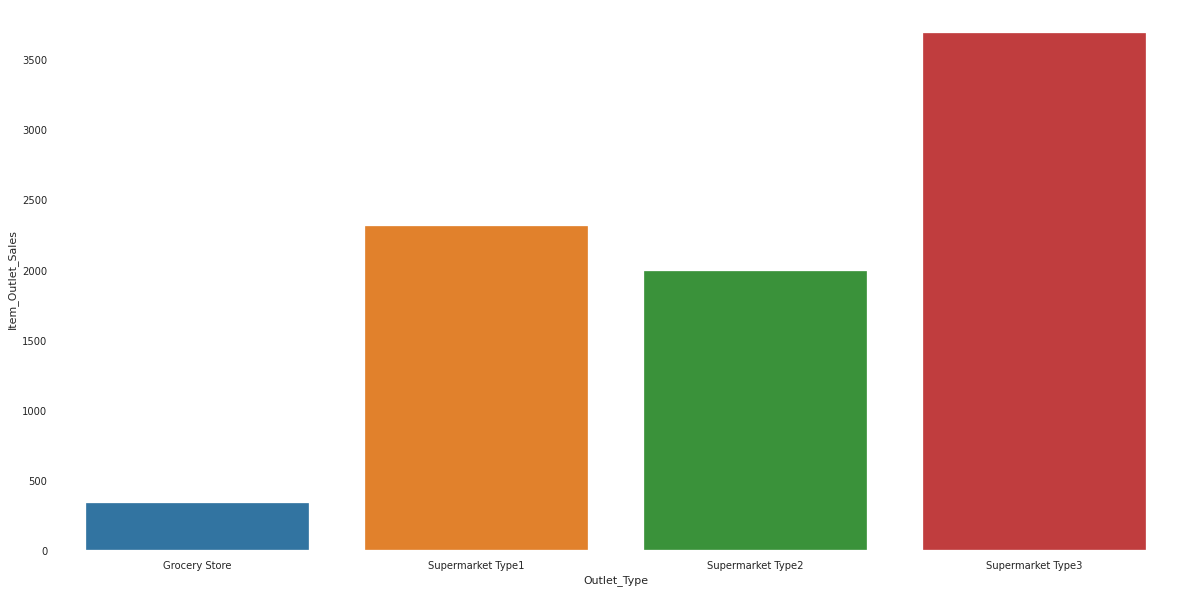

In [33]:
plt.figure(figsize=(20,10))
y=pd.DataFrame(data_duplicate.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean()).reset_index()
sb.barplot(y['Outlet_Type'],y['Item_Outlet_Sales'])

###**Conclusion: Super_market_Type3 has the highest average sales out of the others.**

### **IMPUTING NULL VALUES:**

### **Imputing null values of the Item_Weight:** 

In [34]:
numerical_data.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


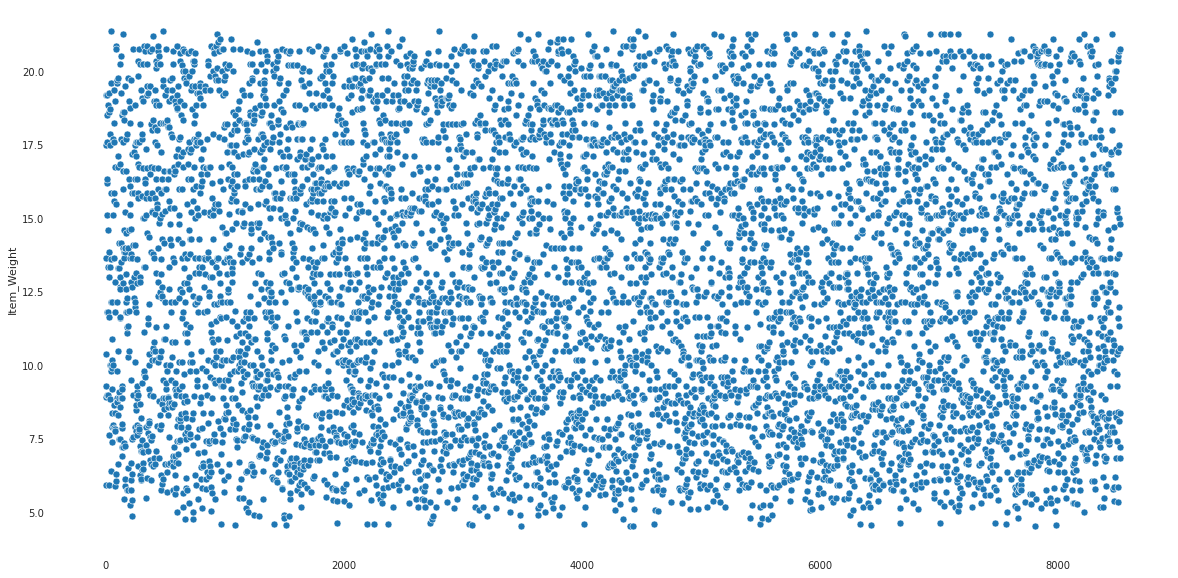

In [35]:
plt.figure(figsize=(20,10))
sb.scatterplot(numerical_data.index,numerical_data['Item_Weight'])

### **Item_weight data is randomly scattered.**

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

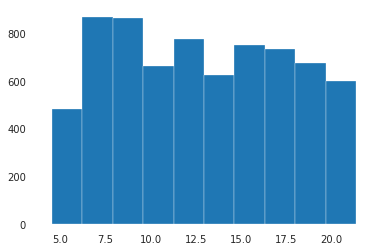

In [36]:
plt.hist(sales_data['Item_Weight'])

### **There is no pattern found in Item weight.**

###    

In [37]:
data_duplicate.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Reducing the item_identifier:**

In [38]:
data_item_identifier=data_duplicate['Item_Identifier']
data_temp=[]
for i in data_item_identifier:
    data_temp.append("".join(list(i)[:3]))
data_duplicate['Item_Identifier']=data_temp
data_duplicate.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
item_data=data_duplicate.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [40]:
item_data.head()

Item_Identifier
DRA    12.704118
DRB    11.022500
DRC    10.954063
DRD    11.590000
DRE    12.889545
Name: Item_Weight, dtype: float64

### **Replacing the null values by that category mean of item_identifier:**

In [41]:
for i in range(len(data_duplicate['Item_Weight'])):
    if pd.isnull(data_duplicate['Item_Weight'].iloc[i]):
        x=data_duplicate['Item_Identifier'][i]
        data_duplicate['Item_Weight'].iloc[i]=item_data[x]   

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [42]:
data_duplicate['Item_Weight'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


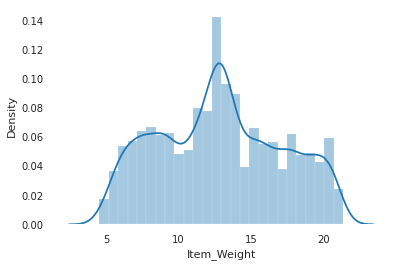

In [43]:
sb.distplot(data_duplicate['Item_Weight'])

### **Imputing null values of the Item_Size:**

In [44]:
data_duplicate.groupby(['Outlet_Identifier','Outlet_Size'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [45]:
data_duplicate.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
a=data_duplicate[['Outlet_Type','Outlet_Size']]
a[a['Outlet_Size']=='Medium']['Outlet_Type'].value_counts()

Supermarket Type3    935
Supermarket Type1    930
Supermarket Type2    928
Name: Outlet_Type, dtype: int64

In [47]:
a=data_duplicate[['Outlet_Type','Outlet_Size']]
a[a['Outlet_Size']=='High']['Outlet_Type'].value_counts()

Supermarket Type1    932
Name: Outlet_Type, dtype: int64

In [48]:
a=data_duplicate[['Outlet_Type','Outlet_Size']]
a[a['Outlet_Size']=='Small']['Outlet_Type'].value_counts()

Supermarket Type1    1860
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [49]:
data_outlet=data_duplicate[data_duplicate['Outlet_Type']=='Supermarket Type1']
data_outlet.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Size'].count()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium         930
                      Small          930
Tier 2                Small          930
Tier 3                High           932
Name: Outlet_Size, dtype: int64

## **From the above results:** 
#### 1) All Grocery Stores comes under "Small" Type
#### 2) All high sized outlets comes under supermarketType1
#### 3) All supermarketType2 and supermarketType3 are Medium size 
#### 4) Amoung the Supermarket, Type1 Tier3 got high outlet_size,and Tier2 got only small size.

###  **Replace the null values according to the above results.**

In [50]:
for i in range(len(data_duplicate['Outlet_Size'])):
    if pd.isnull(data_duplicate['Outlet_Size'].iloc[i]):
        if data_duplicate['Outlet_Type'].iloc[i]=='Grocery Store':
            data_duplicate['Outlet_Size'].iloc[i]='Small'
        elif data_duplicate['Outlet_Type'].iloc[i]=='Supermarket Type2':
            data_duplicate['Outlet_Size'].iloc[i]='Medium'
        elif data_duplicate['Outlet_Type'].iloc[i]=='Supermarket Type3':
            data_duplicate['Outlet_Size'].iloc[i]='Medium'
        elif data_duplicate['Outlet_Type'].iloc[i]=='Supermarket Type1':
            if data_duplicate['Outlet_Location_Type'].iloc[i]=='Tier 1':
                    data_duplicate['Outlet_Size'].iloc[i]='Medium' 
            elif data_duplicate['Outlet_Location_Type'].iloc[i]=='Tier 2':
                data_duplicate['Outlet_Size'].iloc[i]='Small'
            elif data_duplicate['Outlet_Location_Type'].iloc[i]=='Tier 3':
                data_duplicate['Outlet_Size'].iloc[i]='High'
        

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [51]:
data_duplicate['Outlet_Size'].isnull().sum()

0

In [52]:
data_triplicate=data_duplicate.copy() # making a copy of data so that we can modify the columns

In [53]:
data_triplicate=data_duplicate.drop(['Item_Identifier','Item_Fat_Content'],axis=1)

### We are dropping this columns because these are insignificant columns by the Exploratory Data Analysis above.

In [54]:
data_triplicate=pd.get_dummies(data_triplicate, prefix='a')

#   

In [55]:
data_triplicate.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,a_Baking Goods,a_Breads,a_Breakfast,a_Canned,a_Dairy,a_Frozen Foods,a_Fruits and Vegetables,a_Hard Drinks,a_Health and Hygiene,a_Household,a_Meat,a_Others,a_Seafood,a_Snack Foods,a_Soft Drinks,a_Starchy Foods,a_OUT010,a_OUT013,a_OUT017,a_OUT018,a_OUT019,a_OUT027,a_OUT035,a_OUT045,a_OUT046,a_OUT049,a_High,a_Medium,a_Small,a_Tier 1,a_Tier 2,a_Tier 3,a_Grocery Store,a_Supermarket Type1,a_Supermarket Type2,a_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


## **Model Building: Predicting the values of sales for the given data using Regularization models.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


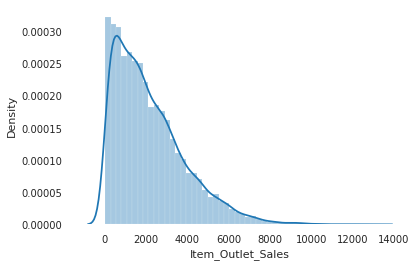

In [56]:
sb.distplot(data_duplicate['Item_Outlet_Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


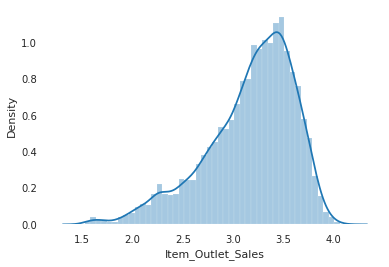

In [57]:
sb.distplot(np.log10(data_duplicate['Item_Outlet_Sales']))

### As we can observe here that Item_Outlet_Sales is right skewed so it is better we use logarithm transform  but after using the log transformation 

#    

In [58]:
X=data_triplicate.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight',],axis=1)
Y=data_triplicate[['Item_Outlet_Sales']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=3)

### **LinearRegression**

In [59]:
linReg=LinearRegression(normalize=True)   #Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
linReg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [60]:
y_predict=linReg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_predict,y_test))
r2_value=r2_score(y_test,y_predict)
print('Root Mean Square Error =',rmse)
print('R-Square =', r2_value)

Root Mean Square Error = 1086.2937355929778
R-Square = 0.6044538820081049


### **Root Mean Square Error = 1086.294**
### **R-Square = 0.6**

# **Applying Regularization Techniques on the data to check whether they are better than the basic linear model:**

### **RidgeRegression**

In [61]:
alpha_list=[0.01,0.05,0.5,5]
for i in alpha_list:
    ridgeReg=Ridge(alpha=i,normalize=True)
    ridgeReg.fit(x_train,y_train)
    rpred=ridgeReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(rpred,y_test))    #Root Mean Square Error
    print('Alpha=',i)
    print('Root Mean Square Error=',rmse)
    print('-----------------------------------------')

Alpha= 0.01
Root Mean Square Error= 1087.0051018563809
-----------------------------------------
Alpha= 0.05
Root Mean Square Error= 1090.587279229989
-----------------------------------------
Alpha= 0.5
Root Mean Square Error= 1161.7271328978456
-----------------------------------------
Alpha= 5
Root Mean Square Error= 1498.8473846509053
-----------------------------------------


### **Root Mean Square Error = 1087.0051018563809**

### **LassoRegression**

In [62]:
for i in alpha_list:
    lassoReg=Lasso(alpha=i,normalize=True)
    lassoReg.fit(x_train,y_train)
    pred=lassoReg.predict(x_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    print('alpha',i)
    print('Root Mean Square Error=',rmse)   
    print('-----------------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18360402.065799713, tolerance: 2100157.6889912337
  positive)


alpha 0.01
Root Mean Square Error= 1086.0913215031712
-----------------------------------------
alpha 0.05
Root Mean Square Error= 1085.3867535491977
-----------------------------------------
alpha 0.5
Root Mean Square Error= 1089.838137966903
-----------------------------------------
alpha 5
Root Mean Square Error= 1336.9914452176145
-----------------------------------------


### **Root Mean Square Error = 1085.3867535491977**

### **xgboost**

In [63]:
from xgboost import XGBRegressor

xgb_value=XGBRegressor(n_estimators=100,random_state=0,silent=True)

xgb_value.fit(x_train,y_train)
y_predict=xgb_value.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_predict,y_test))
print('Root Mean Square Error =',rmse)
#accuracy_score(y_test,y_predict)*100

Root Mean Square Error = 1029.4116636903905


### **Root Mean Square Error = 1029.4116636903905**

## **Final Report:**

### 1) 'Outlet_Establishment_Year','Item_Weight','Item_Visibility' are the insignificant columns to predict the item-outlet sales,as discussed in the EDA above.

### 2) Item_outlet_sales was rightly skewed,so taking the logarithmic transformation increased the R-squared value.

### 3) Xgboost model gave the least RMSE(1029.4116636903905) value so this model is selected among the Regularization models. Using this model, we have predicted the values of sales for the data given and computed Root Mean Square Error (RMSE).

### 4) Predicted values are log-values and to get the actual value one should take the inverse